In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def drawGraph(adjacencyList):
  G = nx.Graph()
  number_nodes = len(adjacencyList) # n
  nodes = range(number_nodes) # [0,1,2,...,n-1]
  G.add_nodes_from(nodes)
  for i, neighbours in enumerate(adjacencyList): #
    for neighbour in neighbours:
      G.add_edge(i, neighbour)
  return G

1. Write a function randomGraph(n, p) that generates the adjacency list of a random graph with n vertices,
where each edge occurs with probability p.

In [2]:
import random

def random_graph(n, p):
  pair_list = []
  for i in range(n-1): 
    for j in range(i+1, n):
        temp = (i, j)
        pair_list.append(temp)
  
  adjacency_list = [[] for i in range(n)]

  for i, j in pair_list:
    if random.random() < p:
      adjacency_list[i].append(j)
      adjacency_list[j].append(i)

  return adjacency_list

2. Plot visual representations of the random graphs for n = 10, 20, 30, 40 and 50. (Look at some examples in the
notebook associated to this project).

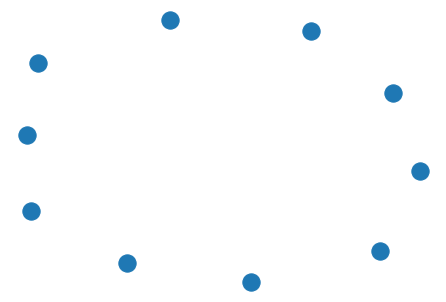

In [3]:
nx.draw(drawGraph(random_graph(10, 0.1)))

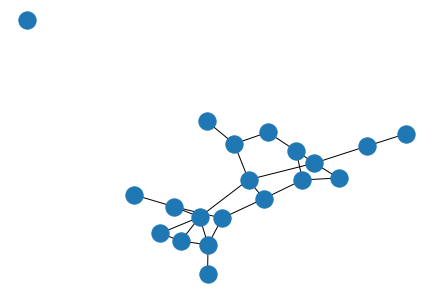

In [4]:
nx.draw(drawGraph(random_graph(20, 0.1)))

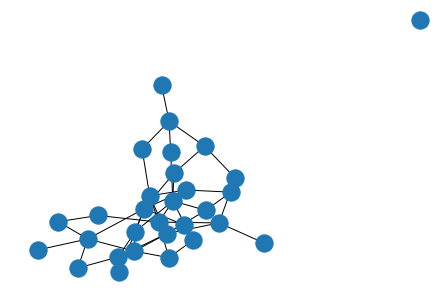

In [5]:
nx.draw(drawGraph(random_graph(30, 0.1)))

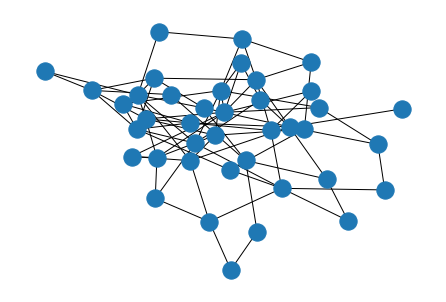

In [6]:
nx.draw(drawGraph(random_graph(40, 0.1)))

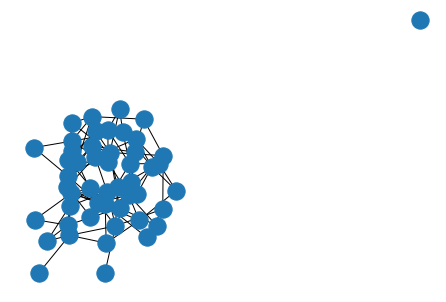

In [7]:
nx.draw(drawGraph(random_graph(50, 0.1)))

3. Write a function largestComponent(graph) which returns the size of the largest component of the graph,
where the input is in adjacency list form. Demonstrate that you understand what the code does, by working
out in detail (line by line) what happens when you call largestComponent([[1] , [0,2] , [1,3,4] , [2] , [2]]).

In [8]:
def largest_component(graph):
  numVertices = len(graph)
  seen = set()
  components = []
  for v in range(numVertices):
    if v not in seen:
      component = set()
      unexplored = {v}
      while unexplored:
        active = unexplored.pop()
        seen.add(active)
        component.add(active)
        #print(component)
        for w in graph[active]:
          if w not in seen:
            unexplored.add(w)
      components.append(component)
      #print(components)
  return len(max(components, key=len))

In [ ]:
'''
graph = [[1], [0, 2], [1, 3, 4], [2], [2]]
largest component should return 5: [0, 1, 2, 3, 4]

numVertices = 5
seen = {}
components = []

v = 0
  0 is not in seen:
    component = {}
    unexplored = {0}

    while unexplored:
      active = 0
      unexplored = {}
      seen = {0}
      component = {0}

      graph[active] = [1]
      w = 1:
        1 is not in seen:
        unexplored = {1}
      
      active = 1
      unexplored = {}
      seen = {0, 1}
      component = {0, 1}

      graph[1] = [0, 2]
      w = 0:
        0 is in seen
      w = 2:
        2 is not in seen
        unexplored = {2}
      
      active = 2
      unexplored = {}
      seen = {0, 1, 2}
      component = {0, 1, 2}

      graph[2] = [1, 3, 4]
      w = 1:
        1 is in seen
      w = 3:
        3 is not in seen
        unexplored = {3}
      w = 4:
        4 is not in seen
        unexplored = {3, 4}
      
      active = 3
      unexplored = {4}
      seen = {0, 1, 2, 3}
      component = {0, 1, 2, 3}

      graph[3] = [2]
      w = 2:
        2 is in seen
      
      active = 4
      unexplored = {}
      seen = {0, 1, 2, 3, 4}
      component = {0, 1, 2, 3, 4}

      graph[4] = [2]
      w = 2:
        2 is in seen
      
    components = [{0, 1, 2, 3, 4}]

v = 1
  1 is in seen

v = 2
  2 is in seen

v = 3
  3 is in seen

v = 4
  4 is in seen

max(components, key=len) = {0, 1, 2, 3, 4}
return len({0, 1, 2, 3, 4}) = 5
'''

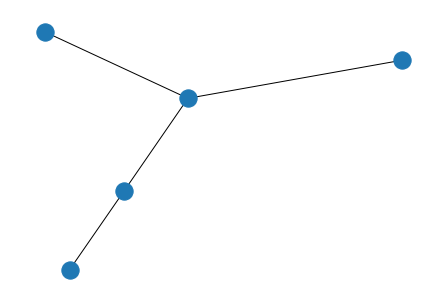

In [10]:
nx.draw(drawGraph([[1],[0,2],[1,3,4],[2],[2]]))

In [11]:
largest_component([[1],[0,2],[1,3,4],[2],[2]])

5

4. Write a function expectedLargest(n, p, trials) which generates trials random graphs and finds the
average normalized size of the largest component. The normalized size of a component is the number of
vertices in the component divided by n, the total number of vertices of the graph.

In [12]:
def expected_largest(n, p, trials):
  largest = [largest_component(random_graph(n, p))/n for i in range(trials)]
  return sum(largest)/trials

5. For n = 20, what is the expected normalized size of a random graph with p = t/n, where t = 1? Do the same
for the range t = 0 to t = 4 in increments of 0.1. Then make a plot of the expected normalized size (y axis) vs
t (x axis).
Finally, do the same thing for n = 20, 60, 120, 300, 600, 1000 and put all plots on the same axes, one curve for
each n.

In [13]:
expected_largest(20, 1/20, 1000)

0.3413999999999997

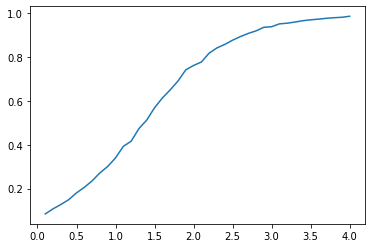

In [14]:
import matplotlib.pyplot as plt

t = [i/10 for i in range(1, 41)] # list comprehension
normalized_size = [expected_largest(20, t[i]/20, 1000) for i in range(len(t))]
plt.plot(t, normalized_size)

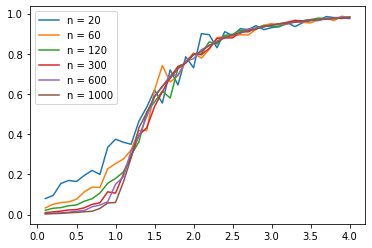

In [15]:
t = [i/10 for i in range(1, 41)] # list comprehension
normalized_size_1 = [expected_largest(20, t[i]/20, 10) for i in range(len(t))]
normalized_size_2 = [expected_largest(60, t[i]/60, 10) for i in range(len(t))]
normalized_size_3 = [expected_largest(120, t[i]/120, 10) for i in range(len(t))]
normalized_size_4 = [expected_largest(300, t[i]/300, 10) for i in range(len(t))]
normalized_size_5 = [expected_largest(600, t[i]/600, 10) for i in range(len(t))]
normalized_size_6 = [expected_largest(1000, t[i]/1000, 10) for i in range(len(t))]
plt.plot(t, normalized_size_1, label = "n = 20")
plt.plot(t, normalized_size_2, label = "n = 60")
plt.plot(t, normalized_size_3, label = "n = 120")
plt.plot(t, normalized_size_4, label = "n = 300")
plt.plot(t, normalized_size_5, label = "n = 600")
plt.plot(t, normalized_size_6, label = "n = 1000")
plt.legend()

In [16]:
def component_ratio(graph):
  numVertices = len(graph)
  seen = set()
  components = []
  for v in range(numVertices):
    if v not in seen:
      component = set()
      unexplored = {v}
      while unexplored:
        active = unexplored.pop()
        seen.add(active)
        component.add(active)
        #print(component)
        for w in graph[active]:
          if w not in seen:
            unexplored.add(w)
      components.append(component)
      #print(components)
  
  len_largest = len(components[0])
  len_second = len(components[0])
  for component in components:
    if len(component) > len_largest:
      len_largest = len(component)
    elif len(component) > len_second:
      len_second = len(component)

  return len_largest/len_second

In [17]:
def expected_ratio(n, p, trials):
  ratio = [component_ratio(random_graph(n, p)) for i in range(trials)]
  return sum(ratio)/trials

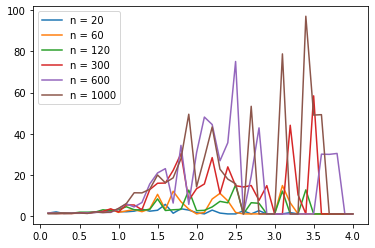

In [18]:
t = [i/10 for i in range(1, 41)] # list comprehension
ratio_1 = [expected_ratio(20, t[i]/20, 10) for i in range(len(t))]
ratio_2 = [expected_ratio(60, t[i]/60, 10) for i in range(len(t))]
ratio_3 = [expected_ratio(120, t[i]/120, 10) for i in range(len(t))]
ratio_4 = [expected_ratio(300, t[i]/300, 10) for i in range(len(t))]
ratio_5 = [expected_ratio(600, t[i]/600, 10) for i in range(len(t))]
ratio_6 = [expected_ratio(1000, t[i]/1000, 10) for i in range(len(t))]
plt.plot(t, ratio_1, label = "n = 20")
plt.plot(t, ratio_2, label = "n = 60")
plt.plot(t, ratio_3, label = "n = 120")
plt.plot(t, ratio_4, label = "n = 300")
plt.plot(t, ratio_5, label = "n = 600")
plt.plot(t, ratio_6, label = "n = 1000")
plt.legend()